In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 数据路径
data_dir = Path('/projectnb/modislc/users/chishan/data/MapBiomas/GEE')

# 读取四个CSV文件
datasets = {
    'Hansen': 'municipality_loss_2009_2022_Hansen.csv',
    'GLANCE': 'municipality_loss_2009_2022_GLANCE.csv',
    'MapBiomas': 'municipality_loss_2009_2022_MapBiomas.csv',
    'TerraClass': 'municipality_loss_2009_2022_TerraClass.csv'
}

# 加载数据
data_dict = {}
for name, filename in datasets.items():
    filepath = data_dir / filename
    df = pd.read_csv(filepath)
    data_dict[name] = df
    print(f"{name}: {df.shape}, columns: {df.columns.tolist()[:5]}...")

print("\n检查数据结构...")
print(f"Hansen columns: {data_dict['Hansen'].columns.tolist()}")


Hansen: (36, 20), columns: ['system:index', 'AREA_KM2', 'CD_MUN', 'Hansen_2009', 'Hansen_2010']...
GLANCE: (36, 17), columns: ['system:index', 'AREA_KM2', 'CD_MUN', 'GLANCE_2009', 'GLANCE_2010']...
MapBiomas: (36, 20), columns: ['system:index', 'AREA_KM2', 'CD_MUN', 'MapBiomas_2009', 'MapBiomas_2010']...
TerraClass: (36, 13), columns: ['system:index', 'AREA_KM2', 'CD_MUN', 'NM_MUN', 'SIGLA']...

检查数据结构...
Hansen columns: ['system:index', 'AREA_KM2', 'CD_MUN', 'Hansen_2009', 'Hansen_2010', 'Hansen_2011', 'Hansen_2012', 'Hansen_2013', 'Hansen_2014', 'Hansen_2015', 'Hansen_2016', 'Hansen_2017', 'Hansen_2018', 'Hansen_2019', 'Hansen_2020', 'Hansen_2021', 'Hansen_2022', 'NM_MUN', 'SIGLA', '.geo']


In [2]:
# 提取年份列并整理数据
def extract_year_columns(df, prefix):
    """提取包含年份的列"""
    year_cols = [col for col in df.columns if col.startswith(prefix)]
    return year_cols

# 获取所有数据集的年份范围
years_dict = {}
for name, df in data_dict.items():
    prefix = name  # Hansen, GLANCE, MapBiomas, TerraClass
    year_cols = extract_year_columns(df, prefix)
    if year_cols:
        years = [int(col.split('_')[-1]) for col in year_cols]
        years_dict[name] = sorted(years)
    else:
        # 查找其他可能的年份列 (例如TerraClass可能没有前缀)
        year_cols = [col for col in df.columns if col.isdigit() or (len(col) == 4 and col.startswith('20'))]
        if year_cols:
            years = [int(col) for col in year_cols]
            years_dict[name] = sorted(years)
        else:
            # 检查地表覆被列
            year_cols = [col for col in df.columns if col.startswith('classification_')]
            if year_cols:
                years = [int(col.split('_')[-1]) for col in year_cols]
                years_dict[name] = sorted(years)

print("数据集年份范围:")
for name, years in years_dict.items():
    print(f"  {name}: {min(years)}-{max(years)}")

# 获取所有ID列
for name in data_dict:
    if 'CD_MUN' in data_dict[name].columns:
        ids = data_dict[name]['CD_MUN'].dropna().unique()
        print(f"\n{name} ID数: {len(ids)}")
        print(f"  前5个ID: {ids[:5]}")


数据集年份范围:
  Hansen: 2009-2022
  GLANCE: 2009-2019
  MapBiomas: 2009-2022
  TerraClass: 2010-2022

Hansen ID数: 36
  前5个ID: [1302405 5103254 5103379 5106158 1500602]

GLANCE ID数: 36
  前5个ID: [1302405 5103254 5103379 5106158 1500602]

MapBiomas ID数: 36
  前5个ID: [1302405 5103254 5103379 5106158 1500602]

TerraClass ID数: 36
  前5个ID: [1302405 5103254 5103379 5106158 1500602]


总共36个Municipality IDs

将创建 6 个图，每个图 6 个subplot
ID列表: [np.int64(1100130), np.int64(1100189), np.int64(1100205), np.int64(1100338), np.int64(1302405), np.int64(1500602), np.int64(1501725), np.int64(1502764), np.int64(1502939), np.int64(1505031), np.int64(1505064), np.int64(1505502), np.int64(1506187), np.int64(1506583), np.int64(1506708), np.int64(1507300), np.int64(1508126), np.int64(5100250), np.int64(5101407), np.int64(5101902), np.int64(5103254), np.int64(5103353), np.int64(5103379), np.int64(5103858), np.int64(5105101), np.int64(5105150), np.int64(5105580), np.int64(5106158), np.int64(5106240), np.int64(5106299), np.int64(5106422), np.int64(5106802), np.int64(5107065), np.int64(5107859), np.int64(5108600), np.int64(5108907)]


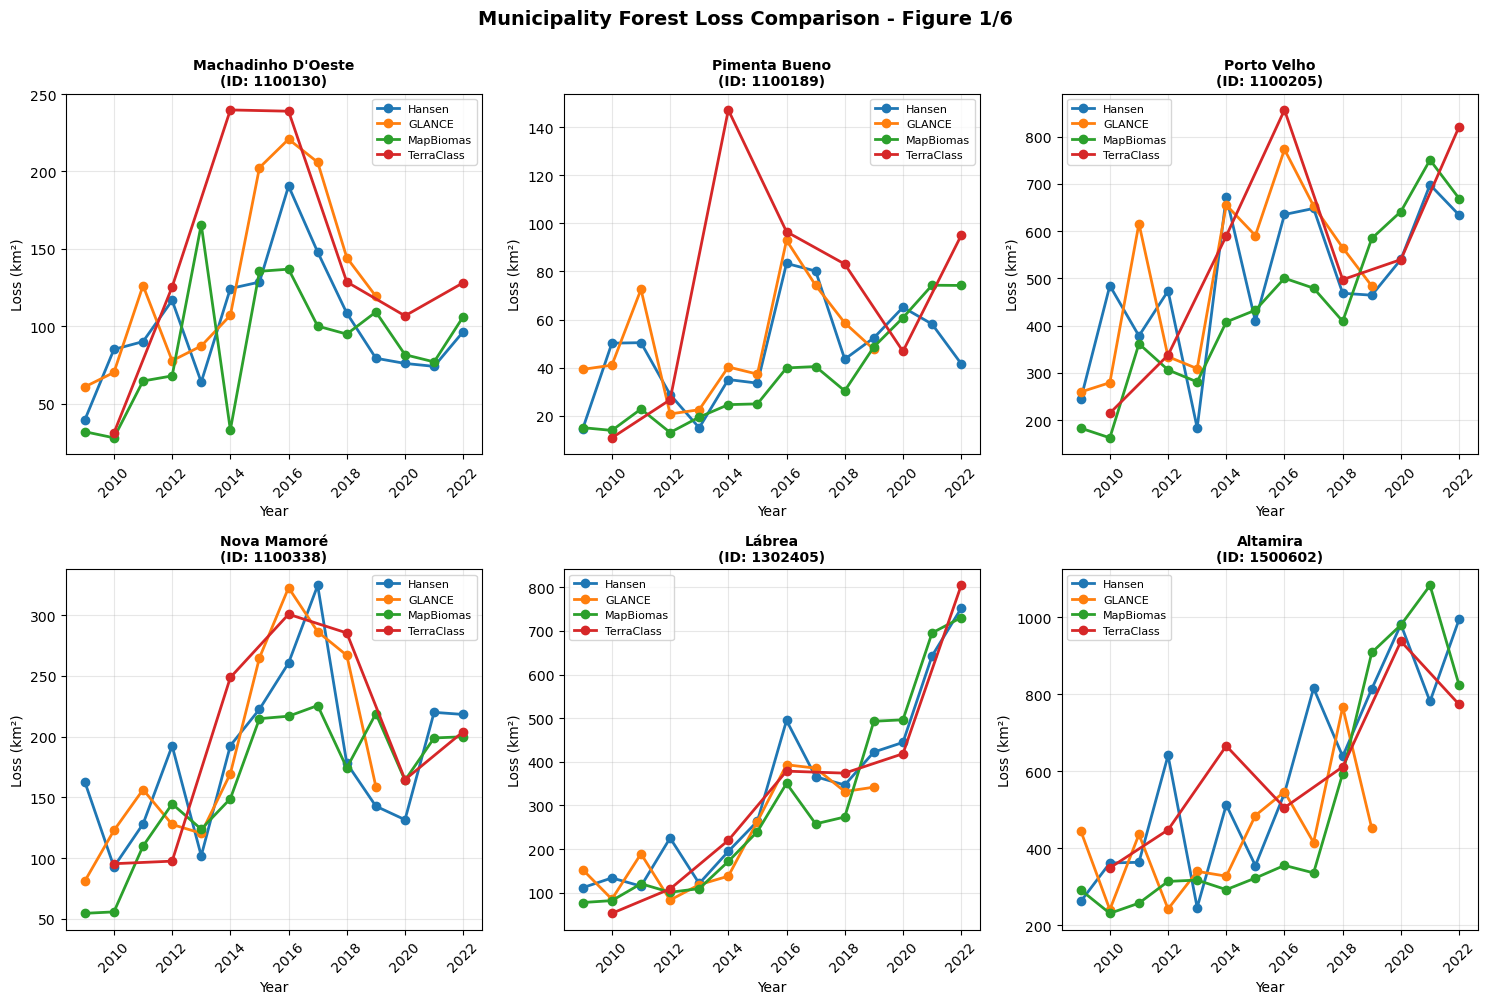

Figure 1/6 plotted with IDs: [np.int64(1100130), np.int64(1100189), np.int64(1100205), np.int64(1100338), np.int64(1302405), np.int64(1500602)]


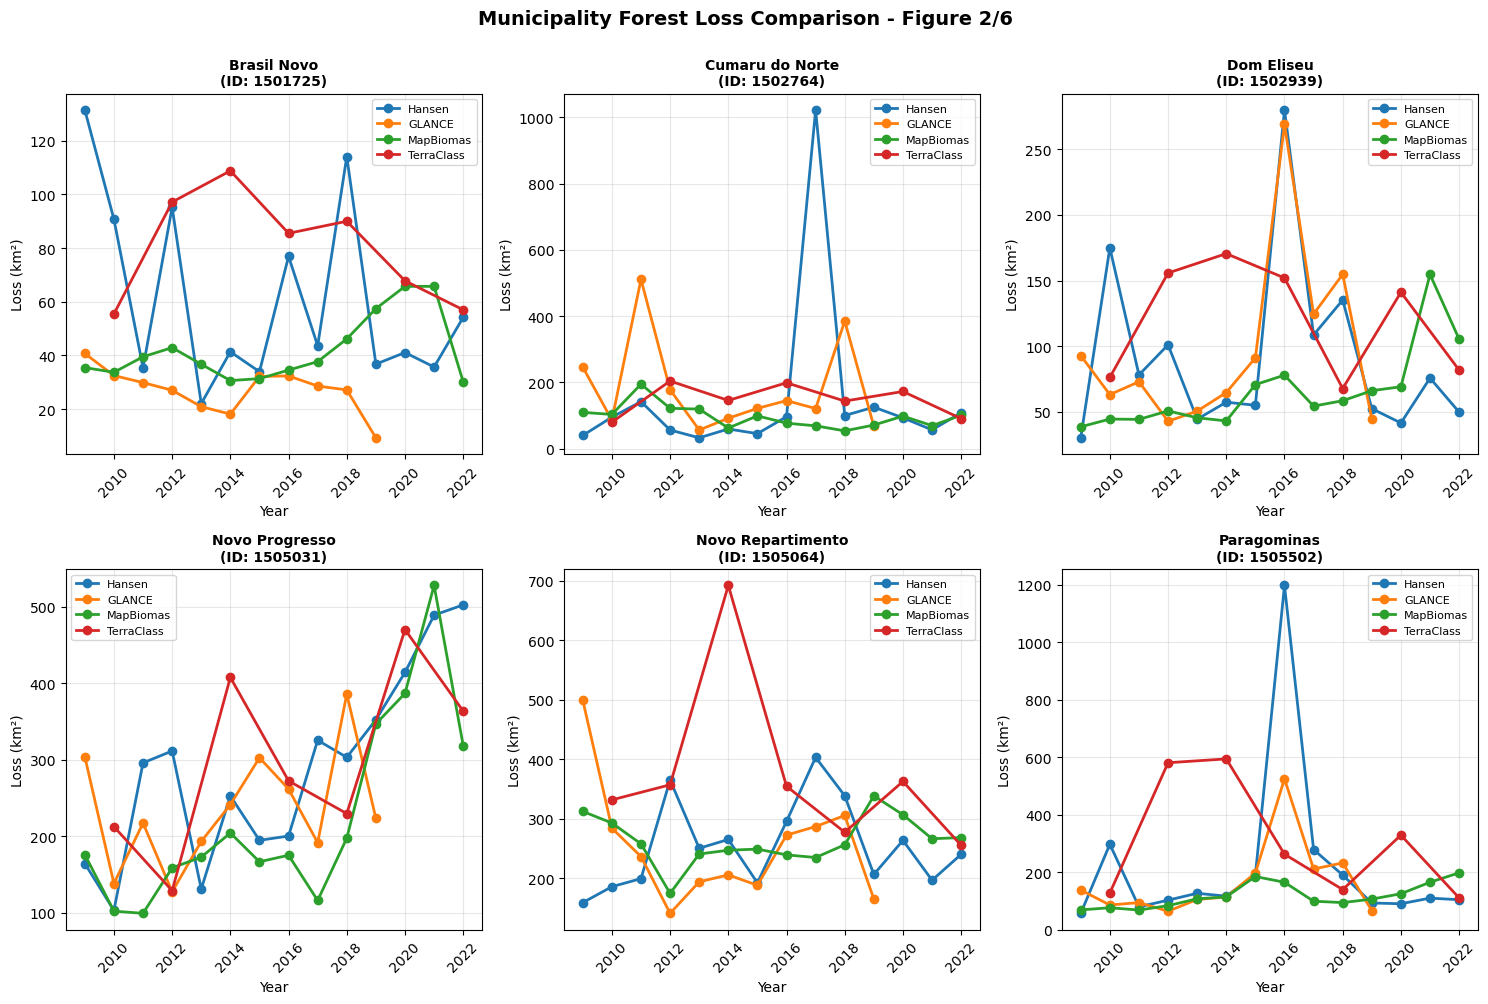

Figure 2/6 plotted with IDs: [np.int64(1501725), np.int64(1502764), np.int64(1502939), np.int64(1505031), np.int64(1505064), np.int64(1505502)]


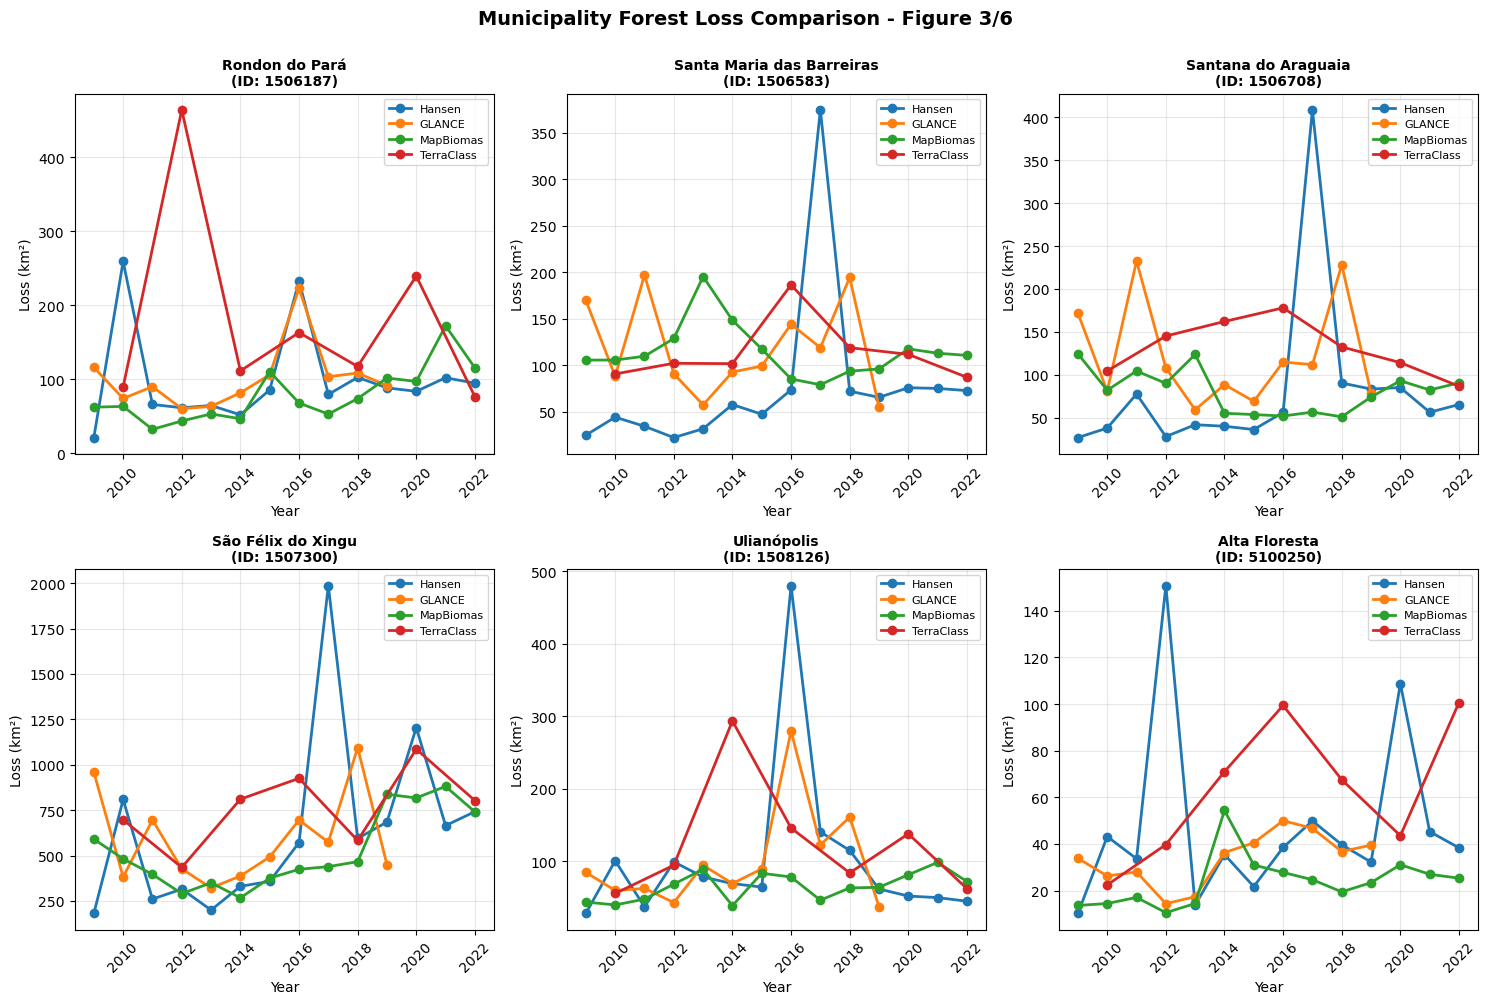

Figure 3/6 plotted with IDs: [np.int64(1506187), np.int64(1506583), np.int64(1506708), np.int64(1507300), np.int64(1508126), np.int64(5100250)]


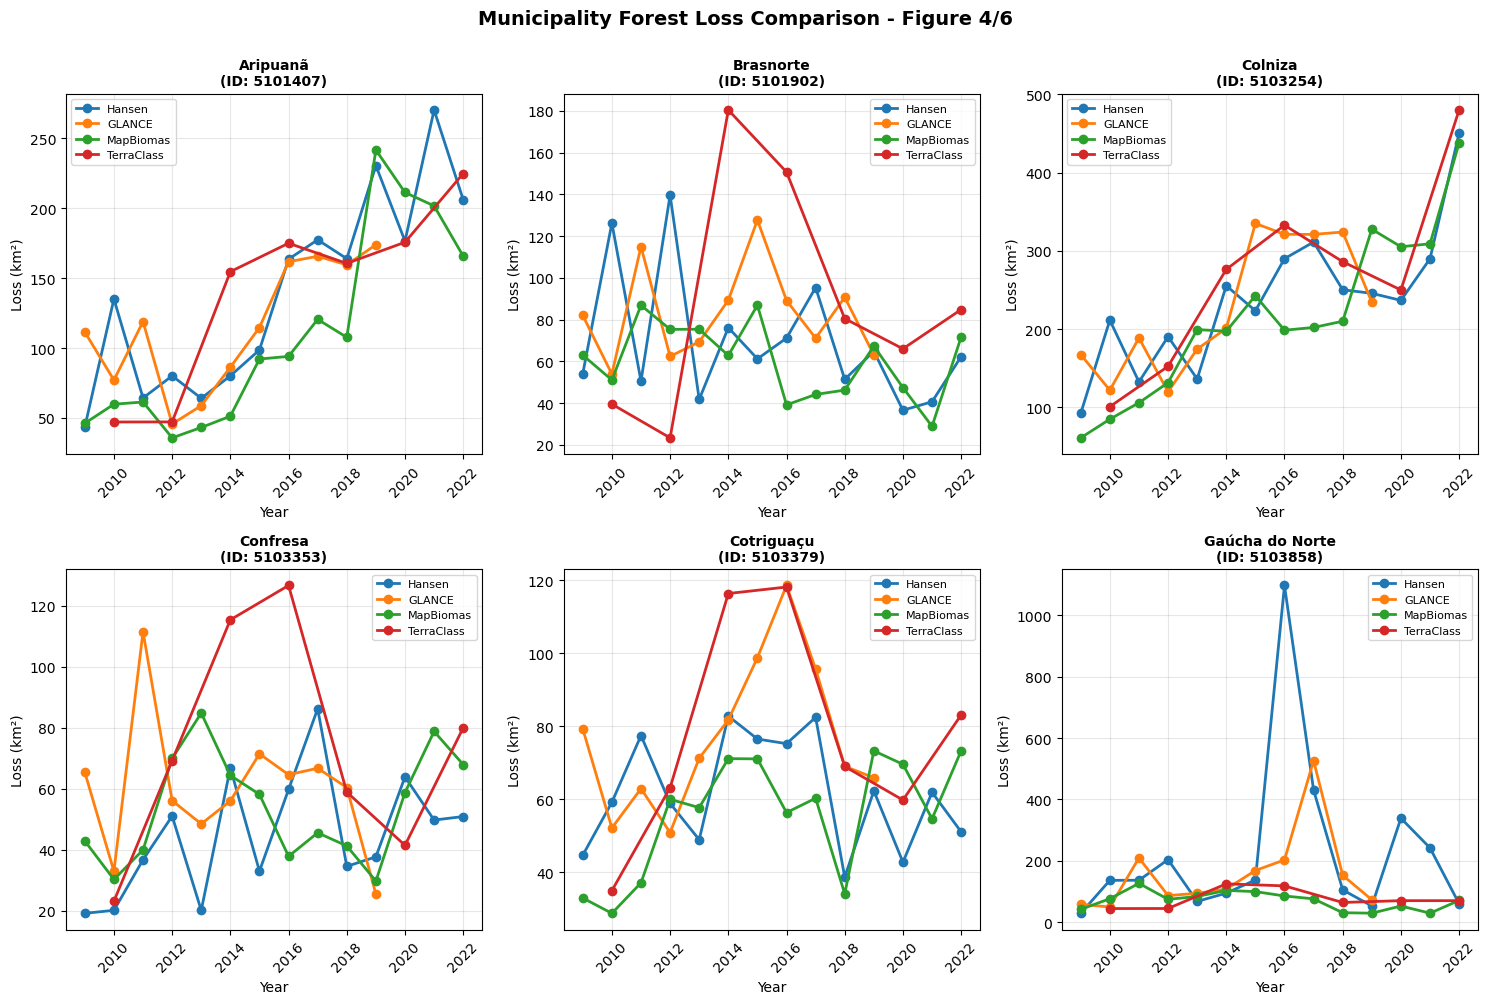

Figure 4/6 plotted with IDs: [np.int64(5101407), np.int64(5101902), np.int64(5103254), np.int64(5103353), np.int64(5103379), np.int64(5103858)]


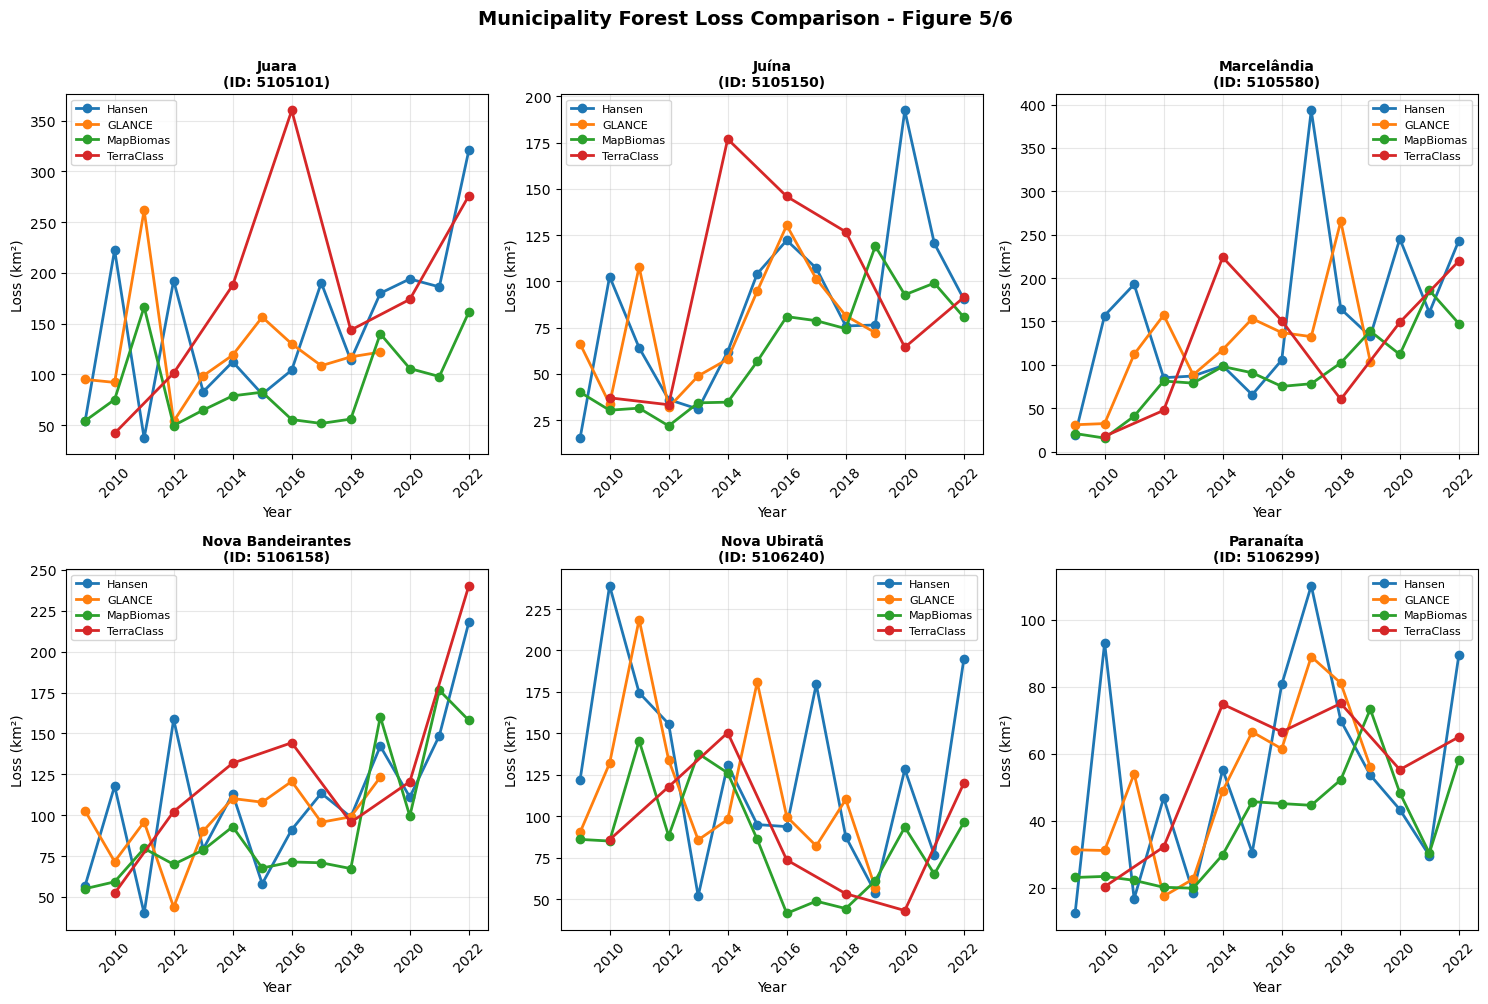

Figure 5/6 plotted with IDs: [np.int64(5105101), np.int64(5105150), np.int64(5105580), np.int64(5106158), np.int64(5106240), np.int64(5106299)]


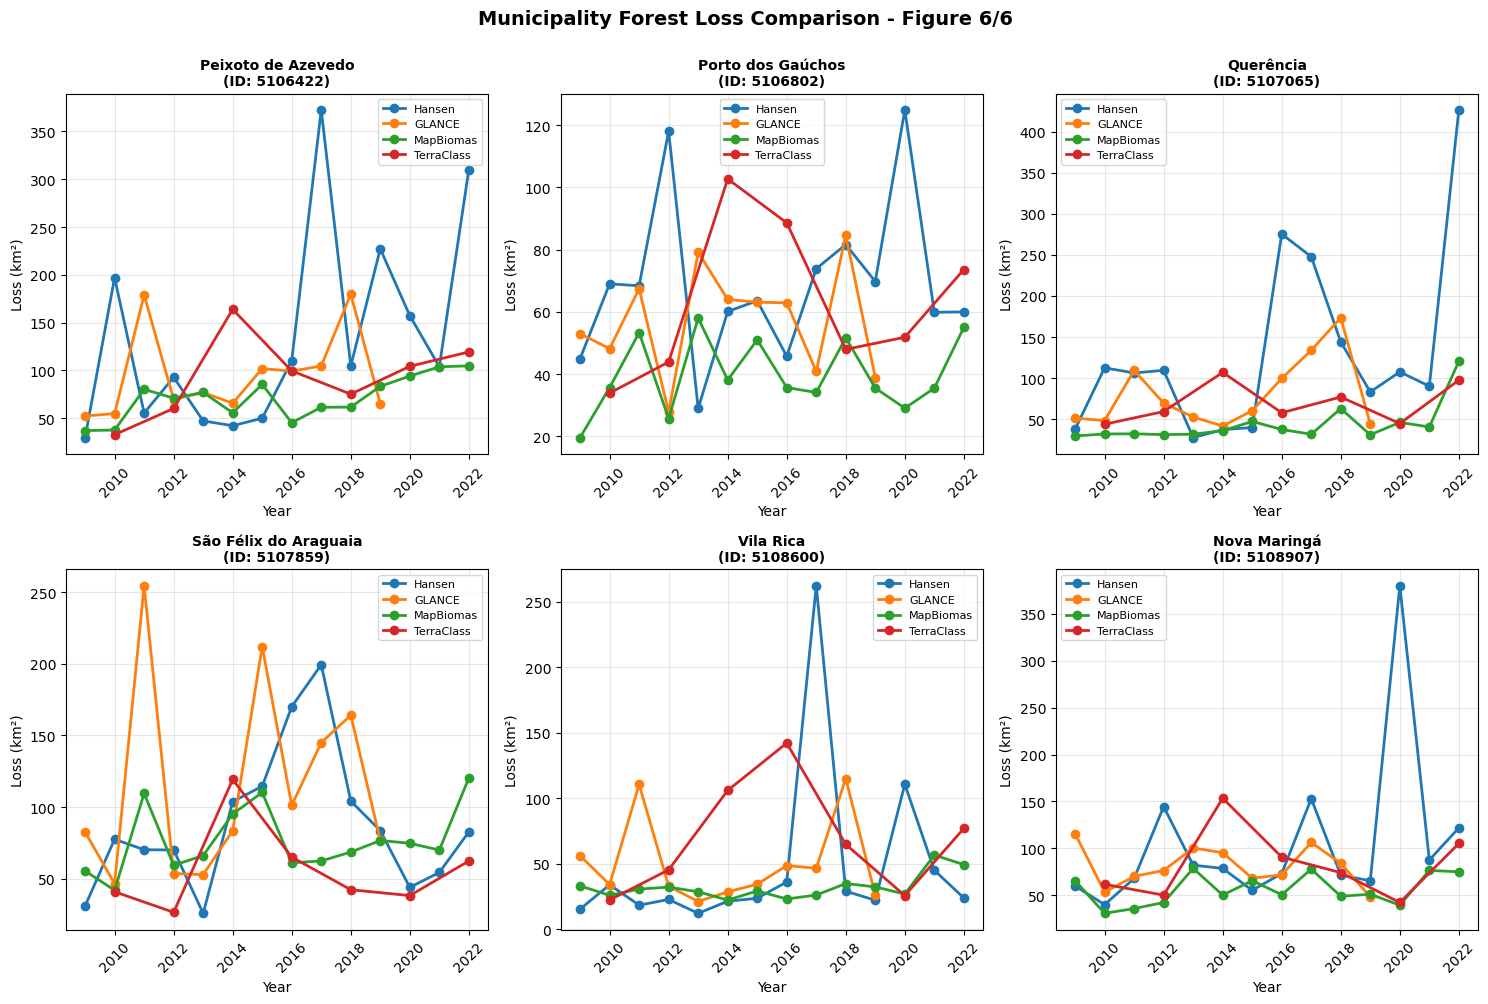

Figure 6/6 plotted with IDs: [np.int64(5106422), np.int64(5106802), np.int64(5107065), np.int64(5107859), np.int64(5108600), np.int64(5108907)]


In [ ]:
# 获取所有独特的ID
all_ids = sorted(data_dict['Hansen']['CD_MUN'].dropna().unique())
print(f"总共{len(all_ids)}个Municipality IDs")

# 定义颜色映射
colors = {
    'Hansen': '#1f77b4',
    'GLANCE': '#ff7f0e', 
    'MapBiomas': '#2ca02c',
    'TerraClass': '#d62728'
}

# 准备绘图参数
subplot_per_figure = 6  # 每个图6个subplot
n_figures = (len(all_ids) + subplot_per_figure - 1) // subplot_per_figure

print(f"\n将创建 {n_figures} 个图，每个图 {subplot_per_figure} 个subplot")
print(f"ID列表: {all_ids}")

# 遍历所有ID并绘制
for figure_idx in range(n_figures):
    start_idx = figure_idx * subplot_per_figure
    end_idx = min(start_idx + subplot_per_figure, len(all_ids))
    ids_in_figure = all_ids[start_idx:end_idx]
    
    # 创建figure
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    # 隐藏多余的subplot
    for ax_idx in range(len(ids_in_figure), subplot_per_figure):
        axes[ax_idx].set_visible(False)
    
    # 为每个ID绘制
    for ax_idx, mun_id in enumerate(ids_in_figure):
        ax = axes[ax_idx]
        
        # 为每个数据集绘制线
        for dataset_name, color in colors.items():
            df = data_dict[dataset_name]
            
            # 获取该municipality的行
            mun_data = df[df['CD_MUN'] == mun_id]
            
            if mun_data.empty:
                continue
                
            # 提取年份和损失值
            prefix = dataset_name
            year_cols = extract_year_columns(mun_data, prefix)
            
            if not year_cols:
                continue
            
            years = [int(col.split('_')[-1]) for col in year_cols]
            values = mun_data[year_cols].values[0]
            
            # TerraClass是两年统计一次，需要除以2转换为年均损失
            if dataset_name == 'TerraClass':
                values = values / 2
            
            # 绘制
            ax.plot(years, values, marker='o', label=dataset_name, color=color, linewidth=2, markersize=6)
        
        # 获取municipality名称
        mun_name = df[df['CD_MUN'] == mun_id]['NM_MUN'].values[0] if 'NM_MUN' in df.columns else f"ID: {mun_id}"
        ax.set_title(f"{mun_name}\n(ID: {mun_id})", fontsize=10, fontweight='bold')
        ax.set_xlabel('Year')
        ax.set_ylabel('Loss (km²)')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
    
    plt.suptitle(f'Municipality Forest Loss Comparison - Figure {figure_idx + 1}/{n_figures}', 
                 fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
    
    print(f"Figure {figure_idx + 1}/{n_figures} plotted with IDs: {ids_in_figure}")
